**Context**
<br>The model implemented in this notebook is designed for binary classification of rice varieties using deep learning. It is trained to distinguish between two specific varities based on their unique morphological characteristics: 
Class 1: Jasmine
Class 0: Gonen

**Dataset Features**
<br>The model utilizes 10 features derived from rice grain such as Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter,Extent, Perimeter, Roundness, and AspectRation.

**Model Implementation**
<br>The classification is performed using a PyTorch-based Artificial Neural Network (ANN). 
Architecture: multi-layer perceptron (MLP) featuring a 16-neuron hidden layer with ReLU activation to handle complex feature relationships.
Hidden Layer: fully connected layer with 16 neurons with ReLU activation.
Output Layer: 1 neuron with Sigmoid activation function for binary probability.
Loss and Optimization: Binary Cross Entropy (BCELoss) loss with Adam optimizer .

**Model Performance**
<br>After 10 epochs of training, the model achieved a training accuracy of 98.96%, indicating a good fit.

**Result**<br>
* Final Training Accuracy - 98.96%
* Final Validation Accuracy - 98.85%
* Final Test Accuracy - 98.82%

**Import necessary modules**

In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

**Read the CSV file to a pandas dataframe**

In [35]:
df = pd.read_csv("/kaggle/input/datasets/mssmartypants/rice-type-classification/riceClassification.csv")
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [36]:
#Check the shape of the dataframe
df.shape

(18185, 12)

In [37]:
#Check the class labels
df['Class'].value_counts().sort_index()

Class
0    8200
1    9985
Name: count, dtype: int64

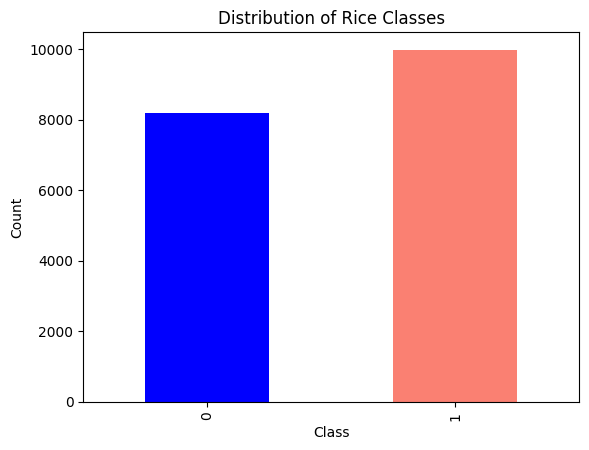

In [38]:
#Use bar plot to display the class values
#Count the class values, sort them (0 and 1) and plot as bar 
df['Class'].value_counts().sort_index().plot(kind='bar', color=['blue', 'salmon'])
plt.title('Distribution of Rice Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isna().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [41]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [42]:
#Splitting the dataframe to features and label
#Drop 'id' and 'class' columns from the features
X = df.drop(['id', 'Class'], axis = 1)
y = df['Class']

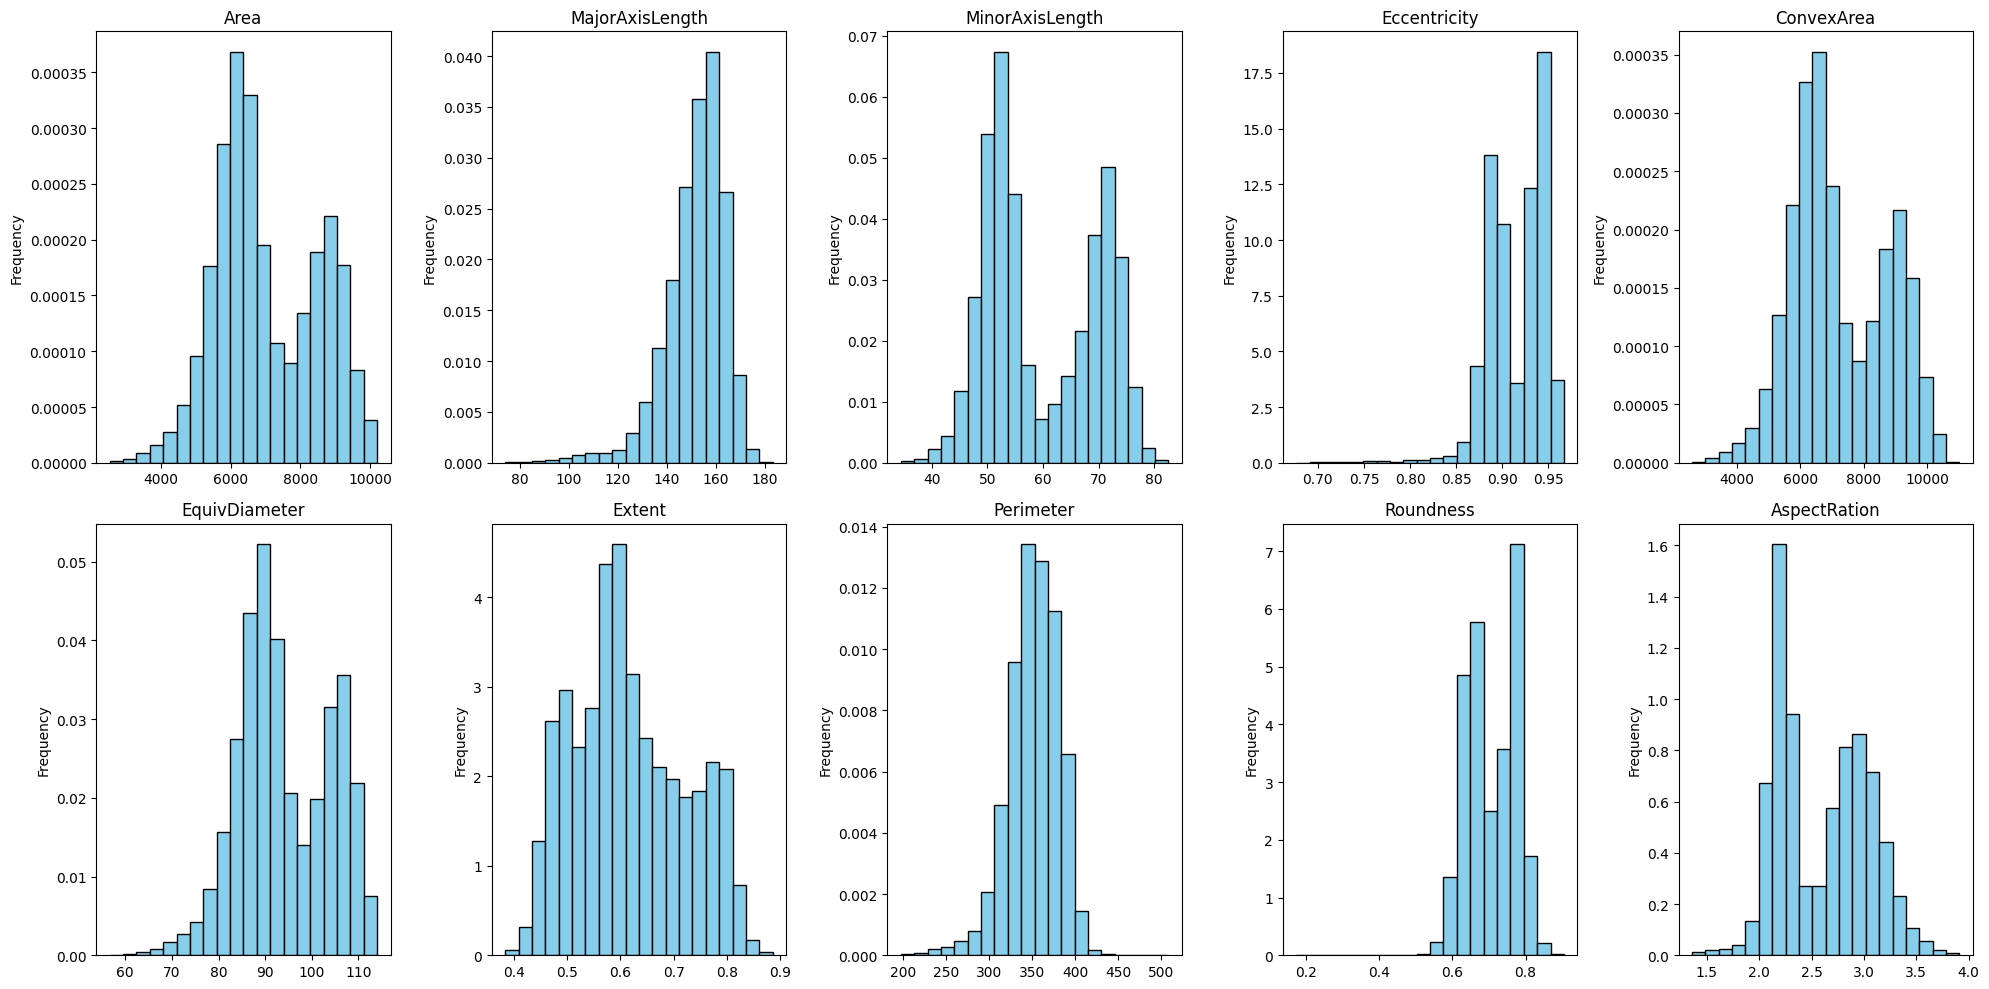

In [43]:
# Create the grid (2 rows, 5 columns)
fig, axs = plt.subplots(2, 5, figsize=(20, 10)) 

# Flatten the 2D array of axes so we can loop through them 
axs_flat = axs.flatten()

# Loop through columns and the flattened axes at the same time
for i, col in enumerate(X.columns):
    X[col].plot(kind='hist', density=True, ax=axs_flat[i], bins=20, color='skyblue', edgecolor='black')
    axs_flat[i].set_title(col) # Adds the feature name as a title to each box

plt.tight_layout()
plt.show()

In [44]:
# Train, VAl and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
print(f"length of train: {len(X_train)}| length of Val: {len(X_val)} | length of test: {len(X_test)}")

length of train: 12729| length of Val: 1819 | length of test: 3637


**Normalize the data using Z-score**

In [45]:
# Calculate the mean and std from train 
train_mean = X_train.mean()
train_std = X_train.std()

#Normalize the train, val and test data using the train stats
#The stats are not calculated from val and test data to avoid data leakage
X_train = (X_train - train_mean) / train_std
X_val = (X_val - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

In [46]:
X_train.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04,1.272900e+04
mean,2.813367e-16,-1.134278e-15,-5.029452e-16,-7.022254e-16,1.317370e-16,-6.452882e-16,-4.772677e-16,-5.057363e-16,-8.938303e-16,9.881674e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.078423e+00,-6.205449e+00,-2.528121e+00,-7.757654e+00,-3.094527e+00,-3.781904e+00,-2.246909e+00,-5.212106e+00,-7.925884e+00,-2.849913e+00
25%,-7.270271e-01,-4.852364e-01,-8.337286e-01,-7.679538e-01,-7.280518e-01,-7.013053e-01,-7.352244e-01,-5.986042e-01,-8.428146e-01,-8.936788e-01
50%,-2.527845e-01,1.805095e-01,-3.941052e-01,2.425221e-01,-2.502187e-01,-2.027247e-01,-1.518521e-01,5.239192e-02,-8.385100e-02,-6.692154e-03
75%,9.376054e-01,6.788668e-01,1.028714e+00,8.452501e-01,9.390251e-01,9.445433e-01,7.485652e-01,7.248988e-01,9.061265e-01,8.383198e-01
max,2.175146e+00,2.545080e+00,2.269202e+00,1.672869e+00,2.530690e+00,2.016838e+00,2.590525e+00,5.306759e+00,2.921311e+00,3.020229e+00


**Define Dataset**

In [47]:
class RiceDataset(Dataset):
    """
    Custom Dataset class to handle Rice classification data.
    Converts Pandas DataFrames/Series into PyTorch Tensors.
    """
    def __init__(self, x, y):
        # Convert input features (X) to float32 tensors
        # .values is used to extract the underlying NumPy array from Pandas
        self.x = torch.tensor(x.values, dtype=torch.float32)
        
        # Convert labels (y) to float32 tensors (required for BCELoss)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        # Returns the total number of samples in the dataset
        return len(self.x)

    def __getitem__(self, index):
        # Returns a single sample (features and label) at the specified index
        # This is called by the DataLoader during training
        return self.x[index], self.y[index]          

In [48]:
#  Initialize the Training Set to train the model 
train_set = RiceDataset(X_train, y_train)

# Initialize the Validation Setnto tune hyperparameters and check for overfitting during training
val_set = RiceDataset(X_val, y_val)

# Initialize the Test Setto evaluate the model on completely unseen data
test_set = RiceDataset(X_test, y_test)

In [49]:
# Define the number of samples to process before the model updates its weights
batch_size = 8

# Create the Training DataLoader: 
# Shuffle=True is used to ensure the model doesn't learn the order of the data
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

# Create the Validation DataLoader: 
# Shuffle=False because we only need to evaluate performance; order doesn't matter here
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)

# Create the Test DataLoader: 
# Shuffle=False to maintain a consistent order for final evaluation and reporting
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [52]:
device = 'cuda'if torch.cuda.is_available() else 'cpu'
print(device)

cpu


**Model Implementation**

In [53]:
class MyModel(nn.Module):
    def __init__(self, input_dim):
        # Initialize the parent nn.Module class.
        #Gives custom class access to all the built-in functionality of nn.Module
        super(MyModel, self).__init__()
        
        # First DLinear layer: Transforms 10 input features into 16 hidden nodes
        self.input_layer = nn.Linear(input_dim, 16) 
        
        # Non-linear activation: Helps the model learn complex, non-linear relationships in the data
        self.relu = nn.ReLU()                       
        
        # Output layer: Reduces the 16 hidden nodes down to 1 single prediction value
        self.linear = nn.Linear(16, 1)
        
        # Sigmoid activation: Squashes the output to a value between 0 and 1 (probability)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Define the flow of data through the network
        x = self.input_layer(x) # Input to Hidden Layer
        x = self.relu(x)        # Apply ReLU activation
        x = self.linear(x)      # Hidden Layer to Output Layer
        x = self.sigmoid(x)     # Apply Sigmoid for binary probability
        return x

# Instantiate the model and move it to the computational device (CPU or GPU)
# X_train.shape[1] ensures the input layer matches your number of features (10)
model = MyModel(X_train.shape[1]).to(device)

In [54]:
# Print a detailed summary of the model architecture, including:
# 1. The shape of the data at each layer
# 2. The total number of trainable parameters (weights and biases)
# (X_train.shape[1],) defines the input shape the summary tool should expect (10 features)
summary(model, (X_train.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]             176
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
           Sigmoid-4                    [-1, 1]               0
Total params: 193
Trainable params: 193
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [55]:
# Define the loss function: Binary Cross Entropy (BCELoss)
# This measures how far the model's probability output (0 to 1) is from the actual label
criterion = nn.BCELoss()

# Define the optimizer: Adam (Adaptive Moment Estimation)
# This algorithm updates the model's weights to minimize the loss
# lr=1e-3 (0.001) is the learning rate, controlling the size of the steps taken during training
optimizer = optim.Adam(model.parameters(), lr=1e-3)

**Training and Validation Loop**

In [56]:
# Number of times the model will see the entire training dataset
epochs = 10

# Lists to capture performance history for later visualization/plotting
train_losses, val_losses = [], []
train_accs, val_accs = [], []

for epoch in range(epochs):
    # --- Training Phase ---
    model.train()  
    running_train_loss = 0.0
    running_train_acc = 0
    
    for inputs, labels in train_loader:
        # Transfer data to the designated device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: Generate predictions
        # .squeeze(-1) converts output shape (8,1) to 8 to match label shape 
        outputs = model(inputs).squeeze(-1)
        labels = labels.float() # Labels must be floats for BCELoss
        loss = criterion(outputs, labels)
        
        # Backward pass: Calculate gradients and update weights
        optimizer.zero_grad()  # Clear old gradients from the previous step
        loss.backward()        # Compute the gradient of the loss (Backpropagation)
        optimizer.step()       # Update model weights based on gradients
        
        # Accumulate Statistics
        running_train_loss += loss.item()
        # For Sigmoid, we round the probability: >= 0.5 is Class 1, < 0.5 is Class 0
        preds = torch.round(outputs)
        running_train_acc += torch.sum(preds == labels).item()

    # --- Validation Phase ---
    model.eval()  # Set model to evaluation mode (disables gradient calculation)
    running_val_loss = 0.0
    running_val_acc = 0
    
    # Disable gradient tracking to save memory and compute power
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(inputs).squeeze(-1)
            labels = labels.float()
            loss = criterion(outputs, labels)
            
            # Accumulate Validation Statistics
            running_val_loss += loss.item()
            preds = torch.round(outputs)
            running_val_acc += torch.sum(preds == labels).item()

    # Calculate average metrics per epoch
    # Loss is averaged over the number of batches
    epoch_train_loss = running_train_loss / len(train_loader)
    epoch_val_loss = running_val_loss / len(val_loader)
    
    # Accuracy is averaged over the total number of samples in the dataset
    epoch_train_acc = running_train_acc / len(train_set)
    epoch_val_acc = running_val_acc / len(val_set)

    # Store results for the history lists
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(epoch_train_acc)
    val_accs.append(epoch_val_acc)

    # Log progress to the console
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}")

Epoch 1/10 | Train Loss: 0.0962 | Train Acc: 0.9716 | Val Loss: 0.0421 | Val Acc: 0.9841
Epoch 2/10 | Train Loss: 0.0374 | Train Acc: 0.9877 | Val Loss: 0.0396 | Val Acc: 0.9874
Epoch 3/10 | Train Loss: 0.0356 | Train Acc: 0.9881 | Val Loss: 0.0382 | Val Acc: 0.9879
Epoch 4/10 | Train Loss: 0.0344 | Train Acc: 0.9879 | Val Loss: 0.0379 | Val Acc: 0.9879
Epoch 5/10 | Train Loss: 0.0336 | Train Acc: 0.9892 | Val Loss: 0.0375 | Val Acc: 0.9885
Epoch 6/10 | Train Loss: 0.0329 | Train Acc: 0.9892 | Val Loss: 0.0373 | Val Acc: 0.9885
Epoch 7/10 | Train Loss: 0.0324 | Train Acc: 0.9895 | Val Loss: 0.0386 | Val Acc: 0.9874
Epoch 8/10 | Train Loss: 0.0319 | Train Acc: 0.9893 | Val Loss: 0.0377 | Val Acc: 0.9890
Epoch 9/10 | Train Loss: 0.0314 | Train Acc: 0.9891 | Val Loss: 0.0378 | Val Acc: 0.9890
Epoch 10/10 | Train Loss: 0.0312 | Train Acc: 0.9896 | Val Loss: 0.0364 | Val Acc: 0.9890


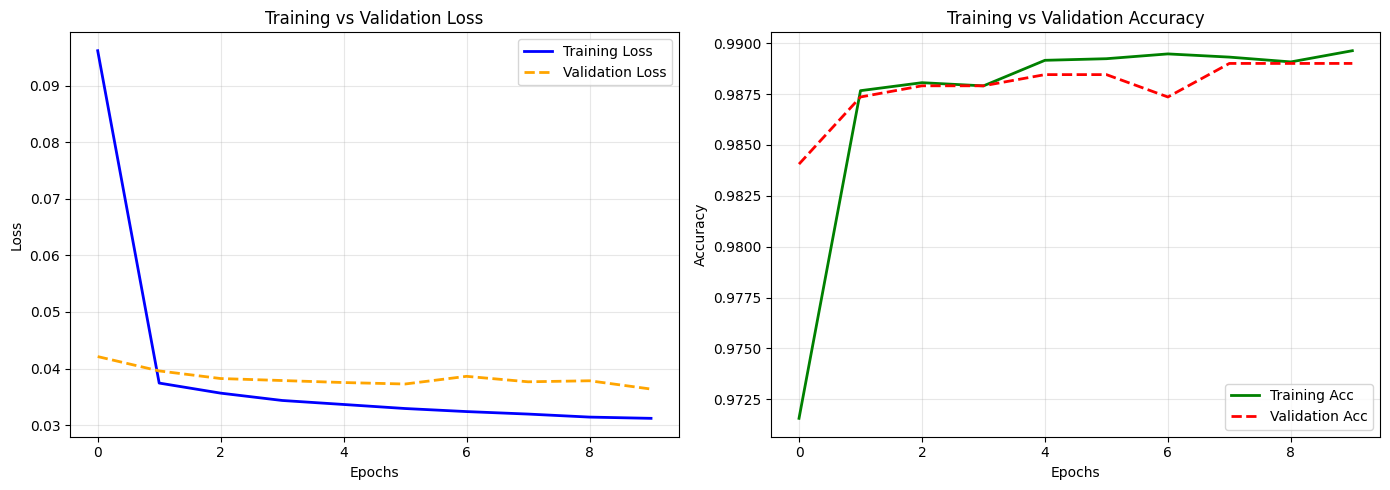

In [57]:
# Create a figure with two subplots
plt.figure(figsize=(14, 5))

# --- Plot 1: Loss ---
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='blue', lw=2)
plt.plot(val_losses, label='Validation Loss', color='orange', lw=2, linestyle='--')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# --- Plot 2: Accuracy ---
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training Acc', color='green', lw=2)
plt.plot(val_accs, label='Validation Acc', color='red', lw=2, linestyle='--')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [67]:
# --- Testing ---
model.eval() 
running_test_loss = 0.0
running_test_acc = 0

# Lists to store all predictions and actual labels for the Confusion Matrix
preds_total = []
labels_total = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs).squeeze(-1)
        labels = labels.float()
        loss = criterion(outputs, labels)
        
        # Statistics
        running_test_loss += loss.item()
        preds = torch.round(outputs)
        running_test_acc += torch.sum(preds == labels).item()
        
        # Move to CPU, convert to list, and extend our total lists
        # .cpu() is vital if you are using a GPU (like in Colab)
        preds_total.extend(preds.cpu().numpy())
        labels_total.extend(labels.cpu().numpy())

#  Calculate averages
test_loss_avg = running_test_loss / len(test_loader)
test_acc_avg = running_test_acc / len(test_set) 

print(f"Test Loss: {test_loss_avg:.4f} | Test Acc: {test_acc_avg:.4f}")

Test Loss: 0.0334 | Test Acc: 0.9882


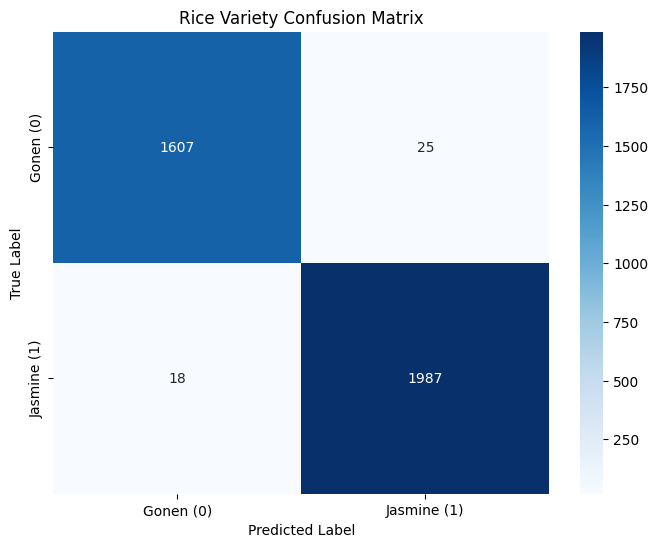

In [72]:
# Generate the matrix (True labels first, then Predictions)
cm = confusion_matrix(labels_total, preds_total)

# Plotting
plt.figure(figsize=(8, 6))
# fmt='d' ensures numbers are integers; cmap='Blues' adds a nice color scale
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Gonen (0)', 'Jasmine (1)'], 
            yticklabels=['Gonen (0)', 'Jasmine (1)'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Rice Variety Confusion Matrix')
plt.show()

In [73]:
# Print a full report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(labels_total, preds_total, target_names=['Gonen (0)', 'Jasmine (1)']))


Classification Report:
              precision    recall  f1-score   support

   Gonen (0)       0.99      0.98      0.99      1632
 Jasmine (1)       0.99      0.99      0.99      2005

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637

